# 대선 자료 시각화


In [90]:
# 모듈 불러오기
import pandas as pd

In [91]:
# Data 불러오기
election = pd.read_csv("../Data/election_2022.csv")
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [92]:
# 기본 통계량 확인하기 : 갯수, 평균, 표준편차, 1~4분위수, 최대값 등등
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [93]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [94]:
# dimension 확인하기
election.shape

(248, 7)

In [95]:
# 컬럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [96]:
# 전체컬럼에 대해 Nan확인
print(election.isna().sum())
print(election.isnull().any())


광역시도    0
시군구     0
선거인수    0
투표수     0
이재명     0
윤석열     0
심상정     0
dtype: int64
광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool


In [97]:
election['electionSum'] = election.iloc[:,4:7].sum(axis=1)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [98]:
election['electionRatio'] = round((election['electionSum']/election['투표수'])*100,2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [99]:
# csv로 저장하기 
election.to_csv("../Data/new_election.csv",index=False)

---
### 광역시별 투표율을 Pie Chart로 표현하기

In [100]:
import seaborn as sns

In [101]:
election['광역시도'].unique()
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [102]:
location = {}
for i in election['광역시도'].unique():
   sum = 0
   location[i] = []
   for j in election[(election['광역시도'] ==i)]['투표수']:    
      sum += j
   location[i].append(sum)
print(location)

{'서울특별시': [6501831], '부산광역시': [2200224], '대구광역시': [1611512], '인천광역시': [1883504], '광주광역시': [985492], '대전광역시': [945308], '울산광역시': [735461], '세종특별자치시': [231832], '경기도': [8518854], '강원도': [1015458], '충청북도': [962333], '충청남도': [1324660], '전라북도': [1235212], '전라남도': [1282168], '경상북도': [1774284], '경상남도': [2146882], '제주특별자치도': [409649]}


In [103]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [104]:
import matplotlib.pyplot as plt

# Warning 무시
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")


<class 'pandas.core.series.Series'>


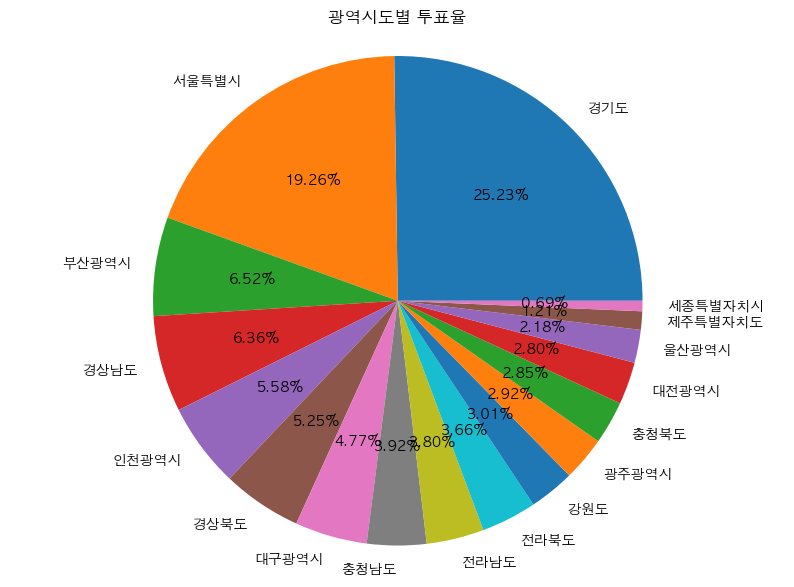

In [105]:
plt.style.use('default')
plt.rcParams['font.family'] = 'AppleGothic'
ratio = election.pivot_table(index=['광역시도'],aggfunc='sum')['투표수'].sort_values(ascending=False)
print(type(ratio))
ratio.plot(
    kind="pie",
    figsize=(10,7),
    autopct = '%.2f%%',
    title = "광역시도별 투표율",
    ylabel = ""
)

plt.axis('equal')
plt.show()

In [106]:
location = {}
for i in election['광역시도'].unique():
   sum = 0
   location[i] = []
   for j in election[(election['광역시도'] ==i)]['윤석열']:    
      sum += j
   location[i].append(sum)
print(location)

{'서울특별시': [3255747], '부산광역시': [1270072], '대구광역시': [1199888], '인천광역시': [878560], '광주광역시': [124511], '대전광역시': [464060], '울산광역시': [396321], '세종특별자치시': [101491], '경기도': [3859666], '강원도': [544980], '충청북도': [483221], '충청남도': [670283], '전라북도': [176809], '전라남도': [145549], '경상북도': [1278922], '경상남도': [1237346], '제주특별자치도': [173014]}


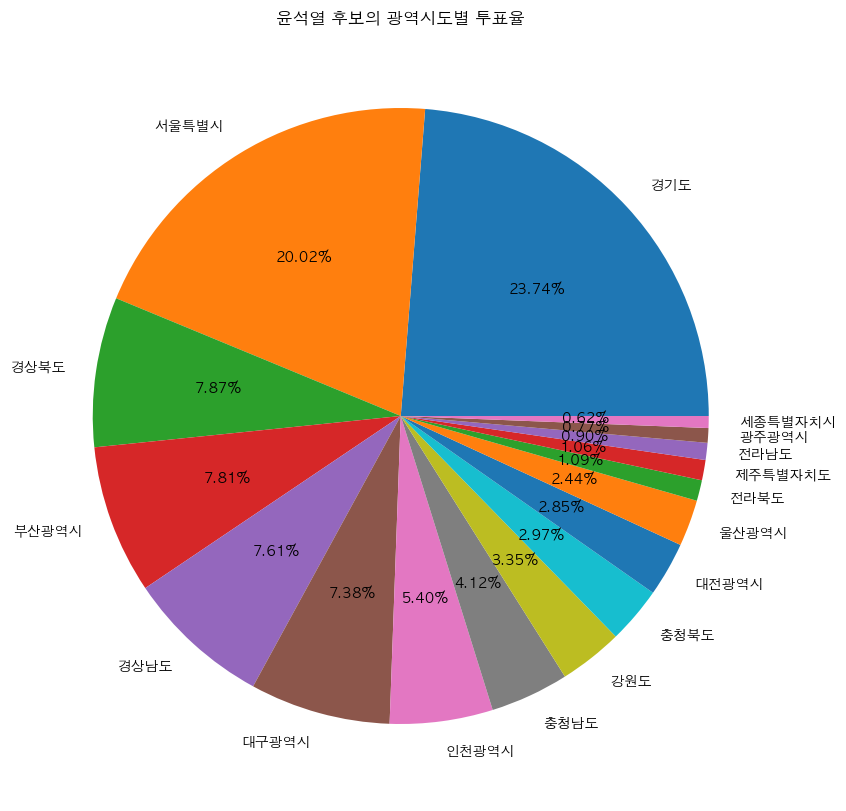

In [107]:
result = pd.DataFrame(location.values(),index = location.keys(),columns = ['윤석열']).sort_values(by='윤석열',ascending=False)
result

plt.figure(figsize = (13,10))
plt.rcParams['font.size'] = 20
plt.style.use('default')
plt.rcParams['font.family'] = 'AppleGothic'

plt.pie(
    x= result['윤석열'],
    autopct = '%.2f%%',
    labels=result.index
)
plt.title("윤석열 후보의 광역시도별 투표율")
plt.show()

In [108]:
top5 = election[(election['광역시도'] == '서울특별시')].sort_values(by='윤석열',ascending=False)[:5]
top5.index = top5['시군구']
top5 = top5['윤석열']
top5.loc['기타']=election[(election['광역시도'] == '서울특별시')].sort_values(by='윤석열',ascending=False)[5:]['윤석열'].sum()
type(top5)


pandas.core.series.Series

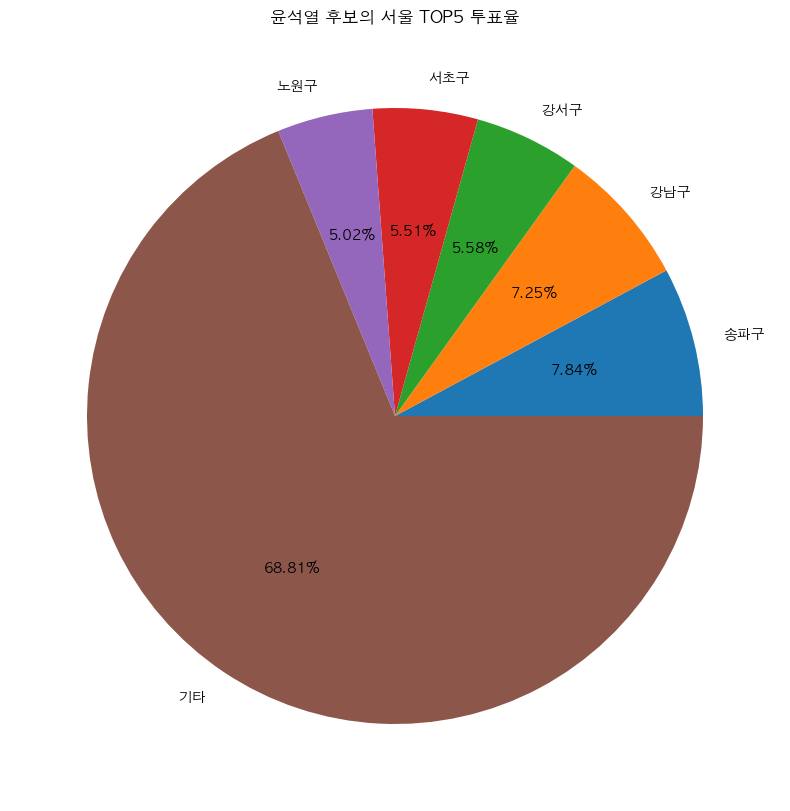

In [109]:
plt.figure(figsize = (13,10))
plt.rcParams['font.size'] = 20
plt.style.use('default')
plt.rcParams['font.family'] = 'AppleGothic'


plt.pie(
    x= top5,
    autopct = '%.2f%%',
    labels=top5.index
)

plt.title("윤석열 후보의 서울 TOP5 투표율")
plt.show()


---
### 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구

In [110]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [111]:
seongbuk = election[(election['시군구']=='성북구')]
seongbuk['기타'] = seongbuk['투표수'] - seongbuk['electionSum']
sb = seongbuk.iloc[:,[5,4,6,9]]
print(sb)
sb.columns

      윤석열     이재명   심상정    기타
7  135044  142702  8952  5489


Index(['윤석열', '이재명', '심상정', '기타'], dtype='object')

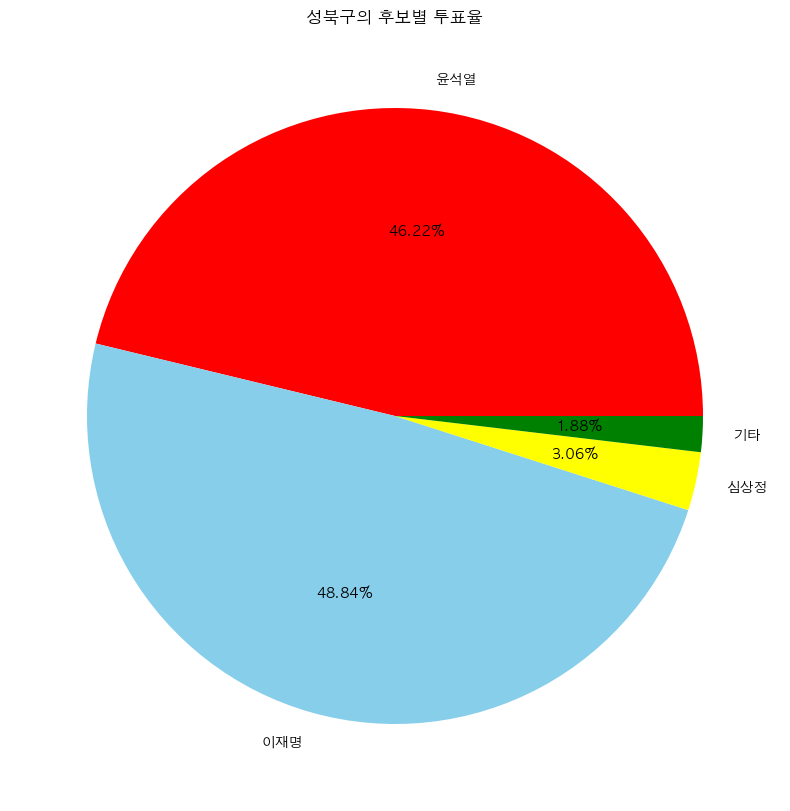

In [112]:
plt.figure(figsize = (13,10))
plt.rcParams['font.size'] = 20
plt.style.use('default')
plt.rcParams['font.family'] = 'AppleGothic'


plt.pie(
    x= sb.iloc[0],
    autopct = '%.2f%%',
    labels=sb.columns,
    colors=['red','skyblue','yellow','green']
)

plt.title("성북구의 후보별 투표율")
plt.show()

---
# 투표수가 가장 많은 4지역의 후보별 득표수 차이

In [143]:
top4 = election.pivot_table(index=['광역시도'],aggfunc='sum')[['투표수','윤석열','이재명','심상정']].sort_values(by='투표수',ascending=False)[:4]
top4.drop(['투표수'],axis=1,inplace=True)
top4=top4/1000

In [158]:
import numpy as np

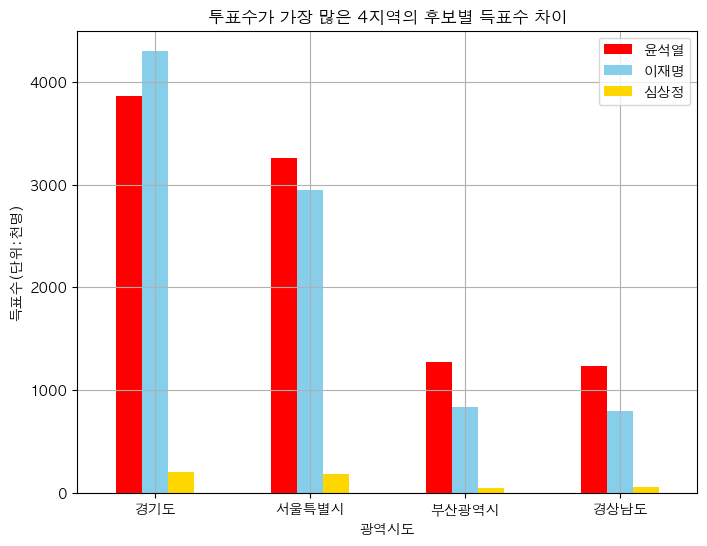

In [163]:
top4.plot(
    kind='bar',
    figsize=(8,6),
    color = ['red','skyblue','gold'],
)

plt.ylim(0,4500)
plt.yticks(np.arange(0,5000,1000))
plt.title('투표수가 가장 많은 4지역의 후보별 득표수 차이')
plt.xlabel('광역시도')
plt.ylabel('득표수(단위:천명)')
plt.grid()
plt.xticks(rotation=0)

plt.show()

---
# 투표수가 높은 시군의 후보별 특표수

In [171]:
top5 = election.sort_values(by='투표수',ascending=False)[:5]
top5['지역'] = top5['광역시도']+" "+top5['시군구']
top5 = top5.iloc[:,[9,5,4,6]]
top5.index = top5['지역']
top5

,지역,윤석열,이재명,심상정
지역,,,,
경기도 화성시,경기도 화성시,236055,283324,12955
경기도 부천시,경기도 부천시,224331,285227,13249
경기도 남양주시,경기도 남양주시,203075,239179,10089
서울특별시 송파구,서울특별시 송파구,255166,180490,10652
서울특별시 강서구,서울특별시 강서구,181510,190000,11100


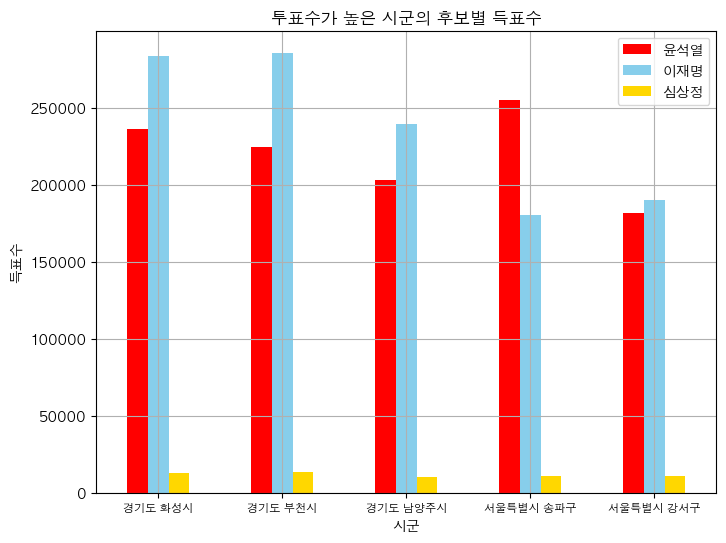

In [180]:
top5.plot(
    kind='bar',
    figsize=(8,6),
    color = ['red','skyblue','gold'],
)

plt.ylim(0,300000)
plt.yticks(np.arange(0,300000,50000))
plt.title('투표수가 높은 시군의 후보별 득표수')
plt.xlabel('시군')
plt.ylabel('득표수')
plt.grid()
plt.xticks(rotation=0,size=8)

plt.show()